# Install necessary modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Reading the data file

In [5]:
# Here, I stored the publication data in a google sheet (like microsoft excel sheet). And downloaded it as csv file. Then uploaded here. 

df_publication = pd.read_csv('Publication_Data.csv', na_values = '--')
df_publication.head()

,Paper,Publication_Date,Number_of_Authors,Corresponding_Author,Author_Position,Citation
0,"J. Chem. Phys., 83, 5772",1985-06-12,3,False,2,13.0
1,"Phys. Rev. B, 40, 5657",1989-09-15,3,False,3,84.0
2,"Phonons, 1, 89",1990-01-01,2,False,1,NaN
3,"Phys. Rev. B 43, 4541(R)",1991-02-15,2,False,1,77.0
4,"Phys. Rev. Lett. 69, 1564",1992-09-07,2,False,1,383.0


# Dataframe info

In [ ]:
df_publication.info()

# Total number of rows is = 88. In some columns we have missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Paper                 88 non-null     object 
 1   Publication_Date      88 non-null     object 
 2   Number_of_Authors     88 non-null     int64  
 3   Corresponding_Author  81 non-null     object 
 4   Author_Position       88 non-null     int64  
 5   Citation              83 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.2+ KB


In [ ]:
df_publication.dtypes

# Data types of each column. 

Paper                    object
Publication_Date         object
Number_of_Authors         int64
Corresponding_Author     object
Author_Position           int64
Citation                float64
dtype: object

# Dealing with missing values

In [ ]:
df_publication['Citation'].isnull()

0     False
1     False
2      True
3     False
4     False
      ...  
83    False
84    False
85    False
86    False
87    False
Name: Citation, Length: 88, dtype: bool

In [ ]:
df_publication['Citation'].isnull().sum()

# Total number of missing values in 'Citation' column. 

5

In [ ]:
df_publication.isnull().sum()

# Total number of missing values in different columns. 

Paper                   0
Publication_Date        0
Number_of_Authors       0
Corresponding_Author    7
Author_Position         0
Citation                5
dtype: int64

In [ ]:
df_publication['Citation'].median()

# Median citation of the papers is = 10. i.e., 50% of the total papers is cited less or equal to 10 times. 

10.0

In [6]:
df_publication['Citation'].fillna(10, inplace = True)

# Filling the missing values in the 'Citation' column by median citation, which is 10. 

In [ ]:
df_publication.isnull().sum()

Paper                   0
Publication_Date        0
Number_of_Authors       0
Corresponding_Author    7
Author_Position         0
Citation                0
dtype: int64

# Plot and analysis

## Citation of each paper

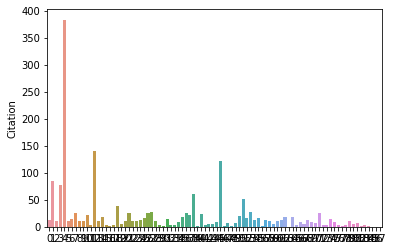

In [ ]:
sns.barplot(x = df_publication.index, y = 'Citation', data = df_publication);

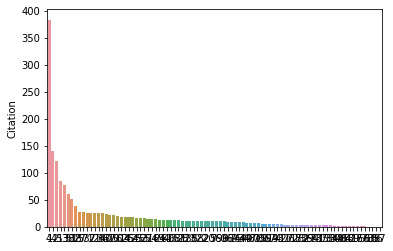

In [ ]:
sns.barplot(x = df_publication.index, y = 'Citation', data = df_publication, 
            order = df_publication.sort_values('Citation', ascending = False).index);

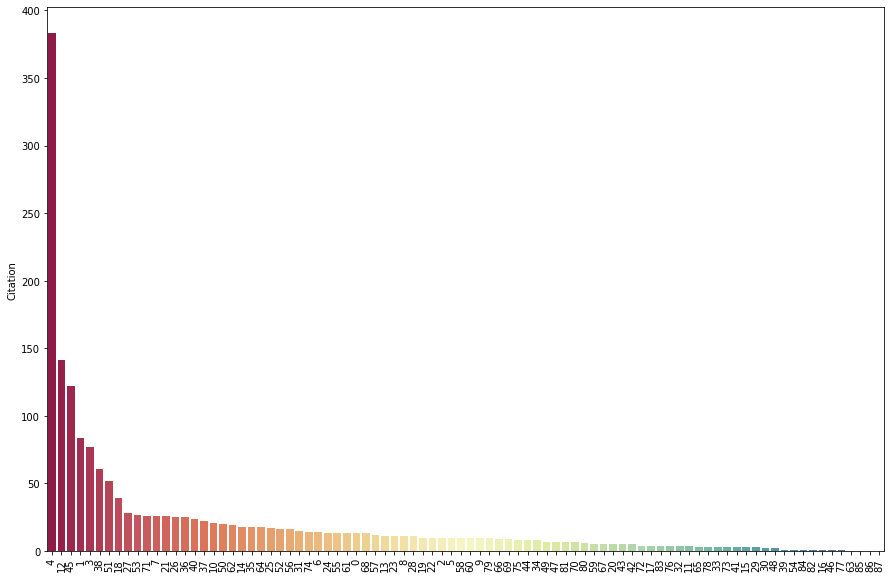

In [ ]:
plt.gcf().set_size_inches(15, 10)

sns.barplot(x = df_publication.index, y = 'Citation', data = df_publication, 
            order = df_publication.sort_values('Citation', ascending = False).index, 
            palette = 'Spectral');
             
plt.xticks(rotation = 90)
plt.show()

# This plot captures the citation of each paper and they colored according to the heights of the bars. 

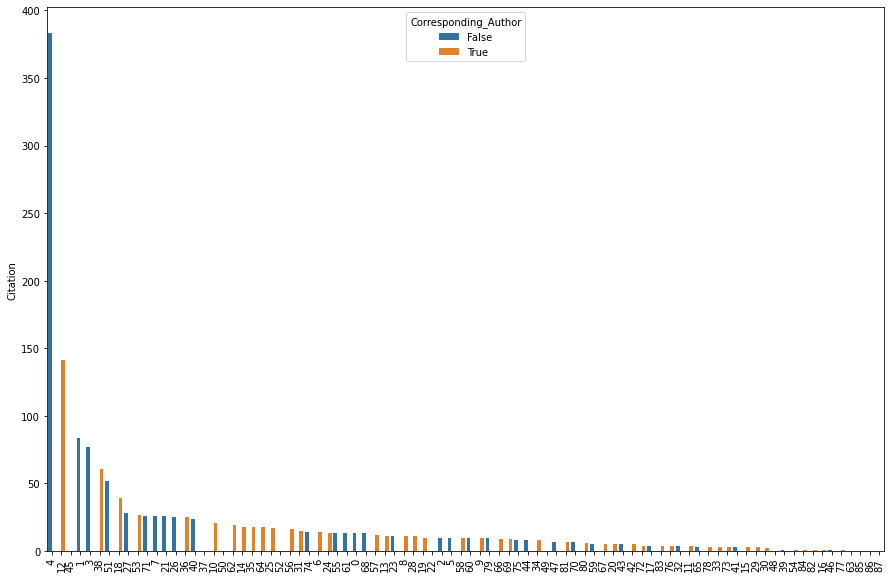

In [ ]:
plt.gcf().set_size_inches(15, 10)

sns.barplot(x = df_publication.index, y = 'Citation', data = df_publication, 
            hue = 'Corresponding_Author', 
            order = df_publication.sort_values('Citation', ascending = False).index);
             
plt.xticks(rotation = 90)
plt.show()

# This plot captures the citation of each paper, along with the corresponding authorship in each paper. 

In [ ]:
df_publication[df_publication['Citation'] >= 50]

,Paper,Publication_Date,Number_of_Authors,Corresponding_Author,Author_Position,Citation
1,"Phys. Rev. B, 40, 5657",1989-09-15,3,False,3,84.0
3,"Phys. Rev. B 43, 4541(R)",1991-02-15,2,False,1,77.0
4,"Phys. Rev. Lett. 69, 1564",1992-09-07,2,False,1,383.0
12,"Phys. Rev. B 65, 064302",2002-01-03,2,True,1,141.0
38,"J. Am. Chem. Soc. 133, 9, 2801–2803",2011-02-14,3,True,2,61.0
45,"J. Chem. Phys., 137, 054702 - 054703",2012-08-01,8,NaN,8,122.0
51,"J. Phys. Chem. C 118, 15, 7741–7750",2014-03-24,5,False,5,52.0


In [ ]:
df_publication[df_publication['Citation'] >= 50].count()

# Only 7 papers have got citations >= 50!!! 
# Out of these 7 papers, the authos has corresponding authorship in only 2 papers.

Paper                   7
Publication_Date        7
Number_of_Authors       7
Corresponding_Author    6
Author_Position         7
Citation                7
dtype: int64

In [ ]:
df_publication[df_publication['Citation'] <= 20].count()

# The author has 70 papers (out of her total 88 papers, i.e., 79.55%) which got cited less or equal to 20 times (or in other words, did not 
# got cited more than 20 times)!!! 

Paper                   70
Publication_Date        70
Number_of_Authors       70
Corresponding_Author    65
Author_Position         70
Citation                70
dtype: int64

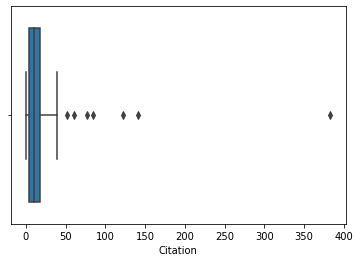

In [ ]:
sns.boxplot(x = 'Citation', data = df_publication);

# We see that all the 7 papers having citation >=50 are all outliers!!! 
# 50 citation is an outlier for an author!!! This is very strange. This indicates how low is citation per paper for this author. 

## Corresponding author

In [ ]:
df_publication['Corresponding_Author'].sum() / len(df_publication.index) * 100

# The author has corresponding authorship in 53.4% of her total paper. In the rest ~47% papers, she is not a corresponding author. 

53.40909090909091

## Extract year from publication date

In [ ]:
pd.to_datetime(df_publication['Publication_Date']).dt.year

0     1985
1     1989
2     1990
3     1991
4     1992
      ... 
83    2021
84    2021
85    2022
86    2022
87    2022
Name: Publication_Date, Length: 88, dtype: int64

## Group by year 

In [ ]:
df_publication.groupby(pd.to_datetime(df_publication['Publication_Date']).dt.year).count()

,Paper,Publication_Date,Number_of_Authors,Corresponding_Author,Author_Position,Citation
Publication_Date,,,,,,
1985,1,1,1,1,1,1
1989,1,1,1,1,1,1
1990,1,1,1,1,1,1
1991,1,1,1,1,1,1
1992,1,1,1,1,1,1
1993,1,1,1,1,1,1
1995,1,1,1,1,1,1
1997,1,1,1,1,1,1
1998,1,1,1,1,1,1


In [ ]:
df_publication.groupby(pd.to_datetime(df_publication['Publication_Date']).dt.year).count()['Paper']

Publication_Date
1985    1
1989    1
1990    1
1991    1
1992    1
1993    1
1995    1
1997    1
1998    1
2001    3
2002    4
2003    3
2004    3
2006    1
2007    2
2008    4
2009    6
2010    3
2011    5
2012    3
2013    4
2014    4
2015    5
2016    1
2017    5
2018    3
2019    7
2020    7
2021    3
2022    3
Name: Paper, dtype: int64

In [ ]:
df_1 = df_publication.groupby(pd.to_datetime(df_publication['Publication_Date']).dt.year).sum()

df_1.head(15)

# We first groupby the original dataframe by year, then we apply sum() function, and finally aggregate automatically. 
# What does the sum() function? It sums the all the non-null values of all the numerical columns for each group. And write the sum of the corresponding column
# for each group. 

,Number_of_Authors,Author_Position,Citation
Publication_Date,,,
1985,3,2,13.0
1989,3,3,84.0
1990,2,1,10.0
1991,2,1,77.0
1992,2,1,383.0
1993,7,4,10.0
1995,2,1,14.0
1997,2,1,26.0
1998,1,1,11.0


In [5]:
df_2 = df_publication.groupby(pd.to_datetime(df_publication['Publication_Date']).dt.year).count()

df_2.head(15)

# We first groupby the original dataframe by year, then we apply count() function, and finally aggregate automatically. 
# What does the count() function? It counts all the non-null values of all the columns for each group. And write the total count of the corresponding column
# for each group. 

,Paper,Publication_Date,Number_of_Authors,Corresponding_Author,Author_Position,Citation
Publication_Date,,,,,,
1985,1,1,1,1,1,1
1989,1,1,1,1,1,1
1990,1,1,1,1,1,1
1991,1,1,1,1,1,1
1992,1,1,1,1,1,1
1993,1,1,1,1,1,1
1995,1,1,1,1,1,1
1997,1,1,1,1,1,1
1998,1,1,1,1,1,1


## Number of papers at every year

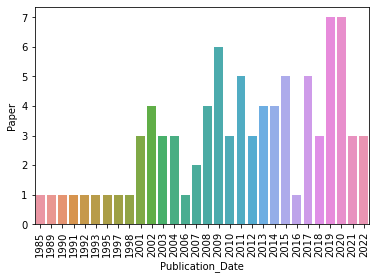

In [6]:
# The labels in the x-axis are overlapping. 

sns.barplot(x = df_2.index, y = 'Paper', data = df_2);
plt.xticks(rotation = 90)  # rotate the xticks by 90 degree. 
plt.show()

# This plot gives Number of papers in each year.

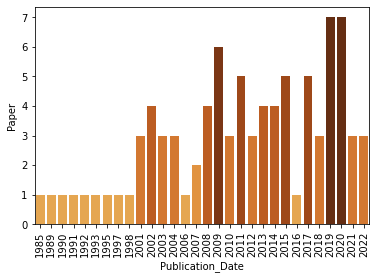

In [7]:
pal = sns.color_palette("YlOrBr", len(df_2))
array = df_2['Paper']
rank = [int((max(array)-elem)*len(df_2)*0.75/(max(array)+1)) for elem in array]

sns.barplot(x = df_2.index, y = 'Paper', data = df_2, palette=np.array(pal[::-1])[rank]);
plt.xticks(rotation = 90)  # rotate the xticks by 90 degree. 
plt.show()

# This plot gives Number of papers in each year. 
# This plot is the same as the previous plot, except, here, the color intensity changes according to the heights of the bars. 

# The author publishes average 3 papers per year (median = 3, mean = 2.93. Shown below). In the initial years (first 13 years!!!), she used to 
# publish only one paper per year. The author did not any paper in the year 1986, 87, 88, 94, 96, 99, 2000, 05. The years 1986, 87, 88 we can 
# discard as she was in her initial stages of PhD. But 1994, 96, 99, 2000 and 05 -- this 5 years she has not a single paper!!! 
# In an year, the author published maximum 7 papers, and that too only in 2 years -- 2019 and 20. 6 papers only in 1 year -- 2009. 
# 5 papers only in 3 years -- 2011, 15, 17. 

In [ ]:
df_2[df_2['Paper'] > 4].count()

# In only 6 years, the author published more than 4 papers. 

Paper                   6
Publication_Date        6
Number_of_Authors       6
Corresponding_Author    6
Author_Position         6
Citation                6
dtype: int64

In [ ]:
df_2[df_2['Paper'] == 5].count()

# In only 3 years, the author published 5 papers. 

Paper                   3
Publication_Date        3
Number_of_Authors       3
Corresponding_Author    3
Author_Position         3
Citation                3
dtype: int64

In [ ]:
df_2[df_2['Paper'] > 5].count()

# In only 3 years, the author published more than 5 papers. 

Paper                   3
Publication_Date        3
Number_of_Authors       3
Corresponding_Author    3
Author_Position         3
Citation                3
dtype: int64

In [ ]:
df_2[df_2['Paper'] > 6].count()

# In only 2 years, the author published more than 6 papers. 

Paper                   2
Publication_Date        2
Number_of_Authors       2
Corresponding_Author    2
Author_Position         2
Citation                2
dtype: int64

In [ ]:
df_2['Paper'].mean()

# Mean number of papers per year is = 2.93. 

2.933333333333333

In [ ]:
df_2['Paper'].median()

# The author publishes about 3 papers per year (meadian = 3, mean = 2.93). 

3.0

## Number of authors vs year

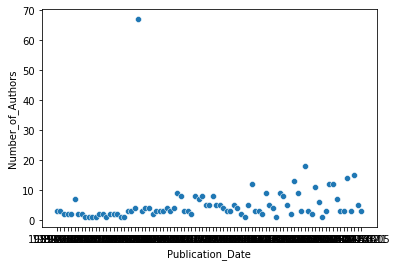

In [ ]:
sns.scatterplot(x = 'Publication_Date', y = 'Number_of_Authors', data = df_publication);

In [ ]:
### Delete rows based on the conditions on columns in pandas dataframe.


# To directly answer this question's original title "How to delete rows from a pandas DataFrame based on a conditional expression" (which I understand is not necessarily the OP's problem but could help other users coming across this question) one way to do this is to use the drop method:

# df = df.drop(some labels)
# df = df.drop(df[<some boolean condition>].index)
# Example

# To remove all rows where column 'score' is < 50:

# df = df.drop(df[df.score < 50].index)
# In place version (as pointed out in comments)

# df.drop(df[df.score < 50].index, inplace=True)
# Multiple conditions

# (see Boolean Indexing)

# The operators are: | for or, & for and, and ~ for not. These must be grouped by using parentheses.

# To remove all rows where column 'score' is < 50 and > 20

# df = df.drop(df[(df.score < 50) & (df.score > 20)].index)


In [ ]:
df_drop_67_authors = df_publication.drop(df_publication[df_publication['Number_of_Authors'] == 67].index)
df_drop_67_authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Paper                 87 non-null     object 
 1   Publication_Date      87 non-null     object 
 2   Number_of_Authors     87 non-null     int64  
 3   Corresponding_Author  80 non-null     object 
 4   Author_Position       87 non-null     int64  
 5   Citation              87 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


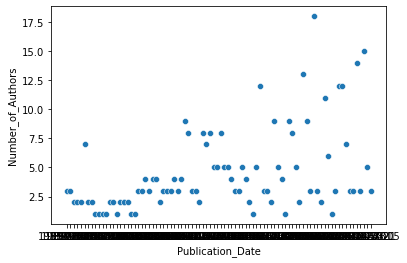

In [ ]:
sns.scatterplot(x = 'Publication_Date', y = 'Number_of_Authors', 
                data = df_drop_67_authors);

# Dropping the outlier 67 number of authors in a paper, we see that, overall, total number of authors in a year increases as the time flows. 

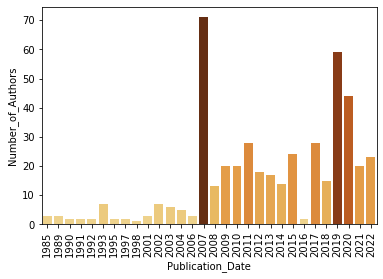

In [ ]:
pal = sns.color_palette("YlOrBr", len(df_1))
array = df_1['Number_of_Authors']
rank = [int((max(array)-elem)*len(df_1)*0.75/(max(array)+1)) for elem in array]

sns.barplot(x = df_1.index, y = df_1['Number_of_Authors'], palette=np.array(pal[::-1])[rank]);
plt.xticks(rotation = 90)  # rotate the xticks by 90 degree. 
plt.show()

# Bar plot also shows that total number of authors in a year increases as year passes. 
# This means, either, total number of papers in a year increases (as time flows) or, number of papers is not increasing, rather number of authors 
# per paper is increasing. 

## Number of authors per paper vs year 

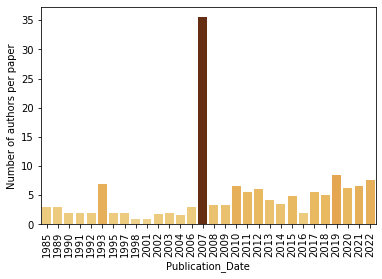

In [ ]:
pal = sns.color_palette("YlOrBr", len(df_1))
array = df_1['Number_of_Authors'] / df_2['Paper']
rank = [int((max(array)-elem)*len(df_1)*0.75/(max(array)+1)) for elem in array]

sns.barplot(x = df_1.index, y = df_1['Number_of_Authors'] / df_2['Paper'], palette=np.array(pal[::-1])[rank]);
plt.xticks(rotation = 90)  # rotate the xticks by 90 degree. 
plt.ylabel('Number of authors per paper')
plt.show()

# We next plot number of authors per paper vs year. 
# Due to the presence of the outlier 67, it is not easily understandable. 

### By droping the outliers 

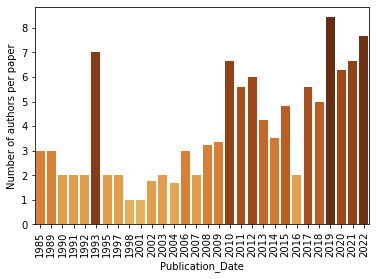

In [ ]:
df_drop_67_authors = df_publication.drop(df_publication[df_publication['Number_of_Authors'] == 67].index)
df_1_drop_67_authors = df_drop_67_authors.groupby(pd.to_datetime(df_drop_67_authors['Publication_Date']).dt.year).sum()


pal = sns.color_palette("YlOrBr", len(df_1))
array = df_1_drop_67_authors['Number_of_Authors'] / df_2['Paper']
rank = [int((max(array)-elem)*len(df_1)*0.75/(max(array)+1)) for elem in array]

sns.barplot(x = df_1.index, y = df_1_drop_67_authors['Number_of_Authors'] / df_2['Paper'], palette=np.array(pal[::-1])[rank]);
plt.xticks(rotation = 90)  # rotate the xticks by 90 degree. 
plt.ylabel('Number of authors per paper')
plt.show()

# By dropping the outlier 67, we see, overall, the number of authors per paper increases as year passes. 

## Number of authors at each paper

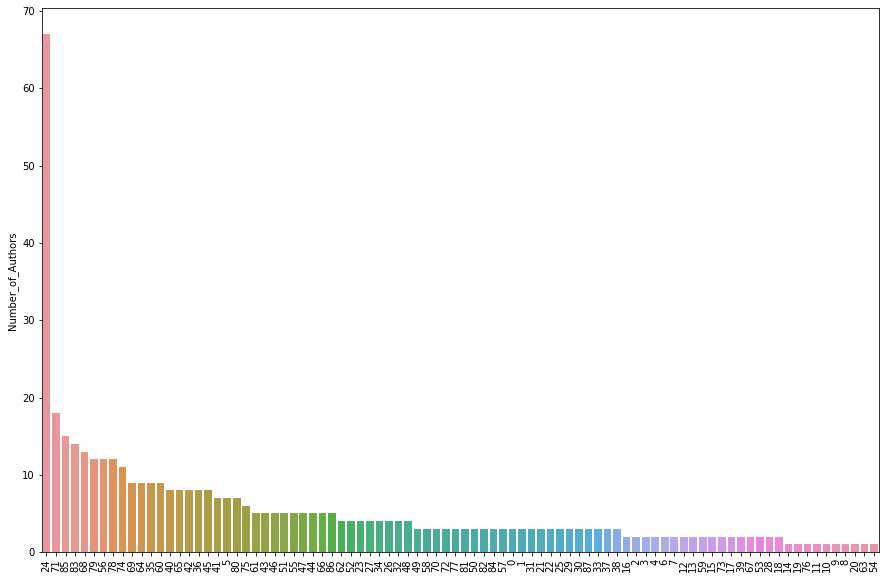

In [ ]:
plt.gcf().set_size_inches(15, 10)

sns.barplot(x = df_publication.index, y = 'Number_of_Authors', data = df_publication, 
            order = df_publication.sort_values('Number_of_Authors', ascending = False).index);
             
plt.xticks(rotation = 90)
plt.show()

# This plot shows the number of authors at each paper. 

In [13]:
df_publication[df_publication['Number_of_Authors'] == 1].count()

# The author has 10 papers which is her own, i.e., 10 single author papers. 

Paper                   10
Publication_Date        10
Number_of_Authors       10
Corresponding_Author    10
Author_Position         10
Citation                10
dtype: int64

In [16]:
df_publication[df_publication['Number_of_Authors'] == 2].count()

# The author has 17 2-authors papers. 

Paper                   17
Publication_Date        17
Number_of_Authors       17
Corresponding_Author    17
Author_Position         17
Citation                17
dtype: int64

In [19]:
df_publication[df_publication['Number_of_Authors'] == 3].count()

# The author has 22 3-authors papers. 

Paper                   22
Publication_Date        22
Number_of_Authors       22
Corresponding_Author    18
Author_Position         22
Citation                22
dtype: int64

In [20]:
df_publication[df_publication['Number_of_Authors'] == 4].count()

# The author has 8 4-authors papers. 

Paper                   8
Publication_Date        8
Number_of_Authors       8
Corresponding_Author    6
Author_Position         8
Citation                8
dtype: int64

In [27]:
df_publication[(df_publication['Number_of_Authors'] >= 5) & (df_publication['Number_of_Authors'] <= 10)].count()

# The author has 22 papers, in which the number of authors is >= 5 and <= 10. 

Paper                   22
Publication_Date        22
Number_of_Authors       22
Corresponding_Author    21
Author_Position         22
Citation                22
dtype: int64

In [28]:
df_publication[df_publication['Number_of_Authors'] > 10].count()

# The author has 9 papers in which number of authors is > 10. 

Paper                   9
Publication_Date        9
Number_of_Authors       9
Corresponding_Author    9
Author_Position         9
Citation                9
dtype: int64

### Donut chart of number of authors

[10, 17, 22, 8, 22, 9]


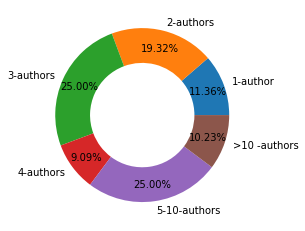

In [66]:
# Here I do a donut chart of the number of authors across the papers. Normal pie chart can be done simply by plt.pie() function. 
# However, to do a donut chart (donut chart has a inner space region whereas pie chart is completely full. This makes donut chart good looking)
# we have to introduce 'wedgeprops' argument which is a dict, and we give the width of the rim as the dict. Here width: 0.4 means, the
# width of the outer rim is 0.4, i.e., if you draw a unit line (1.0) from the centre to the outer radius, then the radius of the rim will 
# be 0.4 and the radius of the inner space region will be 1 - 0.4 = 0.6.  
# The first argument is the data to be plotted. 
# The argument 'labels' corresponds to the list of strings to be assigned to each wedge. 
# The argument 'autopct' writes the percentage of value of each wedge. 
# The argument 'pctdistance' is the relative distance along the radius at which the the text generated by 'autopct' is drawn. To draw the text 
# outside the pie, set 'pctdistance' > 1. This parameter is ignored if 'autopct' is None. 

Section_no_of_authors = [10, 17, 22, 8, 22, 9]  # The list of the number of the corresponding sections to be plotted. 
print(Section_no_of_authors)
items = ['1-author', '2-authors', '3-authors', '4-authors', '5-10-authors', '>10 -authors']

plt.pie(x = Section_no_of_authors, wedgeprops = {'width': 0.4}, labels = items, autopct = '%0.2f%%', pctdistance = 0.8)
plt.show()

# We see that, the author published 11.36% of her total papers as single author, 19.32% papers as 2-authors, 25% papers as 3-authors, 
# 9.09% papers as 4-authors, 25% papers as 5-10 authors, and 10.23% papers as more than 10 authors. 

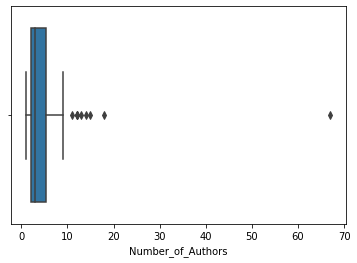

In [ ]:
sns.boxplot(x = 'Number_of_Authors', data = df_publication);

In [ ]:
df_publication['Number_of_Authors'].median()

3.0

In [ ]:
df_publication['Number_of_Authors'].mean()

5.2727272727272725

## Citation vs number of authors

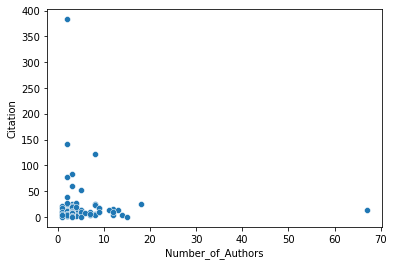

In [ ]:
sns.scatterplot(x = 'Number_of_Authors', y = 'Citation', data = df_publication);

In [ ]:
df_2_drop_383_and_67 = df_publication.drop(df_publication[(df_publication['Citation'] == 383) | (df_publication['Number_of_Authors'] == 67)].index)

df_2_drop_383_and_67.shape

(86, 6)

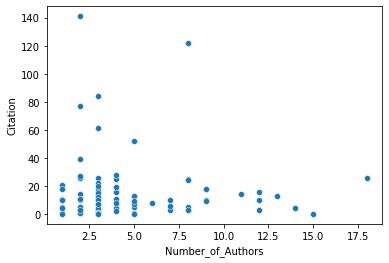

In [ ]:
sns.scatterplot(x = 'Number_of_Authors', y = 'Citation', data = df_2_drop_383_and_67);